<a href="https://colab.research.google.com/github/BharatSingla12/Play-Store-App-Review-Analysis-EDA/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## Importing the all the important libraies 

In [8]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Mount the drive 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Lets explore the user reviews data 

In [9]:
# Load the data 
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EDA Capstone Project/User Reviews.csv")
df.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [7]:
df.info()

NameError: ignored

In [ ]:
df.nunique()

In [ ]:
df.isnull().sum()

In [ ]:
df = df.dropna(how= "all", subset=['Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'])

In [ ]:
df.isnull().sum()

In [ ]:
df['Sentiment'].unique()

In [ ]:
def sentiment(value):
    if value == 'Positive':
        return 1
    elif value == 'Neutral':
        return 0
    elif value == 'Negative':
        return -1
    else:
        return 0
df['Sentiment'] = df['Sentiment'].apply(lambda x :sentiment(x))


In [ ]:
df.head()

In [ ]:
df = df.groupby('App', as_index=False).agg({"Translated_Review": "count", "Sentiment": "mean", "Sentiment_Polarity": "mean", "Sentiment_Subjectivity" : "mean"})


In [ ]:
df = df.sort_values(by='Translated_Review', ascending=False)
df.head()

In [ ]:
df = df.sort_values(by='Sentiment', ascending=False)
df.head()

## Lets explore the playstore data

In [10]:
# Load the playstore data 
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EDA Capstone Project/Play Store Data.csv")

### Lets take a glimpse of the overall data and each column indiviudally 

In [11]:
# Lets view the overall data
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [12]:
# Lets get the basic info of the overall data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [13]:
# list of all the columns 
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [14]:
# Lets check how many Category are there 
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [15]:
# All the unique values of Genres with their frequency 
df['Genres'].value_counts()

Tools                     842
Entertainment             623
Education                 549
Medical                   463
Business                  460
                         ... 
Arcade;Pretend Play         1
Card;Brain Games            1
Lifestyle;Pretend Play      1
Comics;Creativity           1
Strategy;Creativity         1
Name: Genres, Length: 120, dtype: int64

In [16]:
# All the unique values of install with their frequency 
df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

In [17]:
# All the unique values of Type with their frequency 
df['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [18]:
# All the unique values of Content Rating with their frequency 
df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [19]:
# All the unique values of Price with their frequency 
df['Price'].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$1.75         1
$14.00        1
$4.85         1
$46.99        1
$1.04         1
Name: Price, Length: 93, dtype: int64

In [20]:
# All the unique values of Android Ver with their frequency 
df['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

### Lets first deal with the null values and drop the redundant columns.

In [21]:
# All the rows in which atleast one feature is null (exculding Ratings)
None_df = df[(df.drop(['Rating'], axis = 1).isnull().sum(axis=1) >= 1)]
None_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [22]:
# Drop all the rows in which atleast one feature is null (exculding Ratings)
df = df.drop(None_df.index)

In [23]:
# Lets check the null values 
df.isnull().sum().sort_values(ascending = False)

Rating            1469
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [24]:
# Lets drop the redundant columns 
df = df.drop(['Last Updated', 'Current Ver'], axis = 1)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,4.4 and up


### Converting the string formatted numerical data of below columns into integers or floating.

*   Rating
*   Reviews
*   Size
*   Installs
*   Price

In [25]:
# Expressing the Reviews in integers form.

def reviewstonumber(row):
    # Filter out last letter 
    if row[-1].upper() == "M":
        row = int(float(row[0:-1]))*10**6
    else:   
        row = int(row)
    return row

df["Reviews"] = df["Reviews"].apply(reviewstonumber)

In [26]:
# Expressing the Installs in integers form.

def Installstonumber(row):
    try:
        returnvalue = int(row[:-1].replace(',', ''))
    except:
        try:
            returnvalue =  int(row)
        except:
            returnvalue = 0
    return returnvalue

df["Installs"] = df["Installs"].apply(Installstonumber)

In [27]:
# Expressing the Price in integers form.

def pricetonumber(row):
    try:
        returnvalue =float(row[1:].replace(',', ''))
    except:
        try:
            returnvalue =float(row)
        except:
            returnvalue = None

    return returnvalue            

df["Price"] = df["Price"].apply(pricetonumber)

In [28]:
# Expressing the size in numerical data in the units of MB.

def sizetonumber(row):
    # Filter out last letter 
    # Here we are replacing "Varies with size" with the mean of the app size. 
    if row[-1].upper() == "M":
        row = float(row[0:-1])
    elif row[-1].upper() == "K":
        row = float(row[0:-1])/1000
    else:
        row = None                 
    return row

df["Size"] = df["Size"].apply(sizetonumber)
# df['Size'].fillna(df['Size'].mean(), inplace=True)
df.rename(columns={"Size": "Size(MB)"}).head(5)

,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,4.4 and up


### Lets find the insights of the given data 

Here the categorical features are:
1. Category
2. Type
3. Contet Rating
4. Genres
5. Android Ver

Here the numerical features are:
1. Rating
2. Reviews
3. Size(MB)
4. Installs
5. Price

#### Plot (1)
Bar chart for the various android version to understand the distribution of app supporting android version.

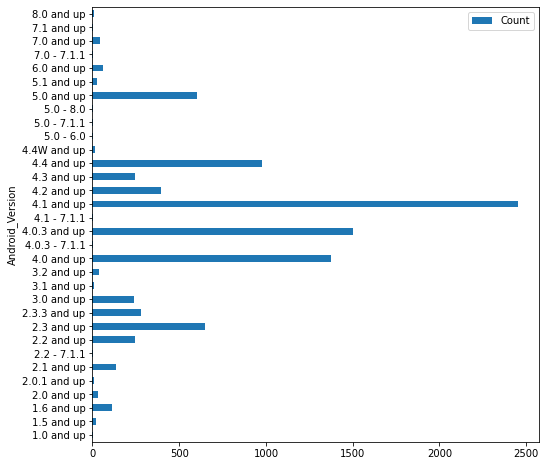

In [29]:
plot_df_0 = df['Android Ver'][df['Android Ver'] != 'Varies with device']
plot_df_1 = pd.DataFrame(plot_df_0.value_counts()).reset_index().rename(columns = {'index' : "Android_Version", 'Android Ver' : "Count"}).sort_values(by='Android_Version', ascending=True)
ax = plot_df_1.plot(x = 'Android_Version', y = 'Count', kind = 'barh', figsize  = (8,8))

#### Plot (2)
Bar chart for the various android version using install to understand the distribution of android version among users.

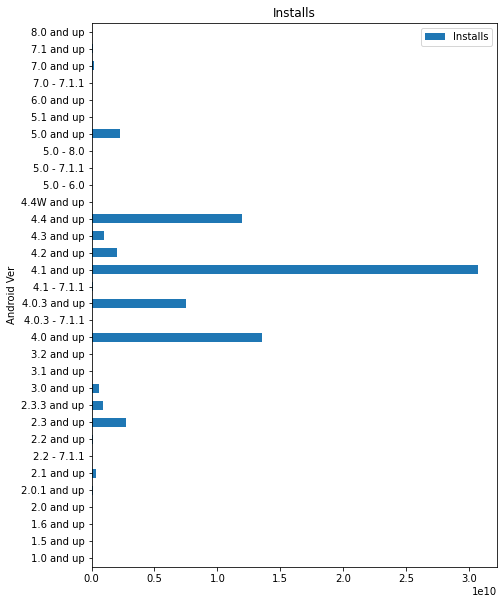

In [30]:
plot_df_0 = df[['Installs', 'Android Ver']][df['Android Ver'] != 'Varies with device']
# ax = plot_df_1.plot(x = 'Android_Version', y = 'Count', kind = 'barh', figsize  = (8,8))

plot_df_1 = plot_df_0.groupby(by= 'Android Ver', as_index=True).sum()
ax  = plot_df_1.plot(rot=0, kind='barh', stacked=True, figsize  = (16,10), subplots=True,sharex = False, sharey = True, layout = (1,2))


#### Plot (3)
Bar plot of Install using the Type.

The average install of paid apps is only 0.54 percent of the mean install of all apps.


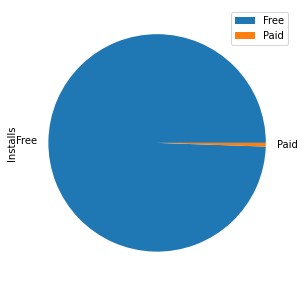

In [139]:
df1 = df[['Installs', 'Type']].groupby('Type', as_index=True).mean().sort_values(by='Installs', ascending=False)
percentage = round((df1.loc['Paid','Installs']/(df1.loc['Paid','Installs']+df1.loc['Free','Installs']))*100, 2)
print(f'The average install of paid apps is only {percentage} percent of the mean install of all apps.')
df1.plot(y ='Installs', kind='pie', figsize  = (5,5))
plt.show()

#### Plot (4)
Bar plot of Install using the category.

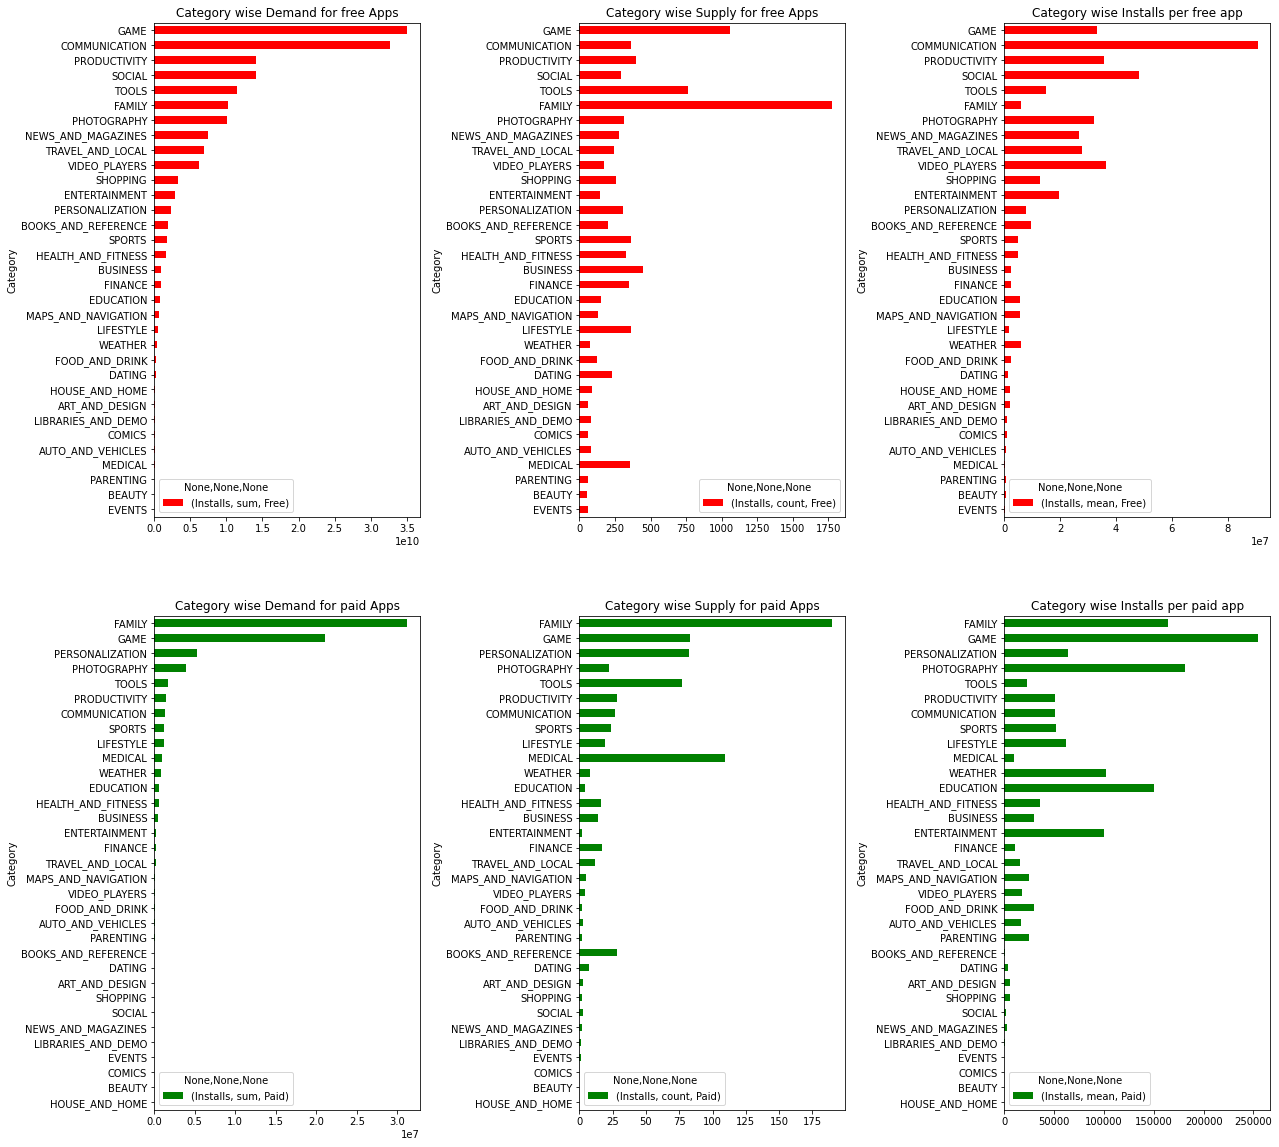

In [158]:
# df1 = df[['Installs', 'Category', 'Type']]  # Select the columns
# df2 = df1.groupby(by= ['Type', 'Category'], as_index=True).sum()  # Create multilayer group by 
# df3 = df2.unstack(level=0)['Installs']      # Unstack using index 
# df4 = df3.reset_index().fillna(0)                  # Reset the index 
# # ax  = df4.plot(x= 'Free', y = 'Category', rot=0, kind='barh', stacked=False, figsize  = (16,10), subplots=True,sharex = False, sharey = True, layout = (1,2))



# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Horizontally stacked subplots')
# fig.subplots_adjust(hspace=0.5, wspace = 0.5)
# # plt.figure(figsize=(16,10))

# df4.sort_values(by='Paid', ascending=True).plot(y = 'Paid', x = 'Category',ax =ax1, kind = 'barh', figsize  = (16,10),color= 'red')
# df4.sort_values(by='Free', ascending=True).plot(y = 'Free', x = 'Category',ax =ax2, kind = 'barh', figsize  = (16,10),color= 'green')
# plt.show()


# =====================================
df1 = df[['Installs', 'Rating', 'Category', 'Type']]  # Select the columns
df2 = df1.groupby(by= ['Type', 'Category'], as_index=True).agg(['sum', 'count', 'mean']).unstack(level=0).fillna(0)

fig, axs = plt.subplots(2, 3, figsize  = (20,20))
# fig.suptitle('Demand and Supply of Category Class')
fig.subplots_adjust(hspace=0.2, wspace = 0.6)

df2.sort_values(by=('Installs', 'sum', 'Free'), ascending=True).plot(y = ('Installs', 'sum', 'Free'), ax = axs[0, 0], kind = 'barh', color= 'red', title = "Category wise Demand for free Apps")
df2.sort_values(by=('Installs', 'sum', 'Free'), ascending=True).plot(y = ('Installs', 'count', 'Free'), ax = axs[0, 1], kind = 'barh',color= 'red', title = "Category wise Supply for free Apps")
df2.sort_values(by=('Installs', 'sum', 'Free'), ascending=True).plot(y = ('Installs', 'mean', 'Free'), ax = axs[0, 2], kind = 'barh',color= 'red', title = "Category wise Installs per free app")


df2.sort_values(by=('Installs', 'sum', 'Paid'), ascending=True).plot(y = ('Installs', 'sum', 'Paid'), ax = axs[1, 0], kind = 'barh', color= 'green', title = "Category wise Demand for paid Apps")
df2.sort_values(by=('Installs', 'sum', 'Paid'), ascending=True).plot(y = ('Installs', 'count', 'Paid'), ax = axs[1, 1], kind = 'barh',color= 'green', title = "Category wise Supply for paid Apps")
df2.sort_values(by=('Installs', 'sum', 'Paid'), ascending=True).plot(y = ('Installs', 'mean', 'Paid'), ax = axs[1, 2], kind = 'barh',color= 'green', title = "Category wise Installs per paid app")


plt.show()

#### Plot (5)
Bar plot of Install using the content rating.

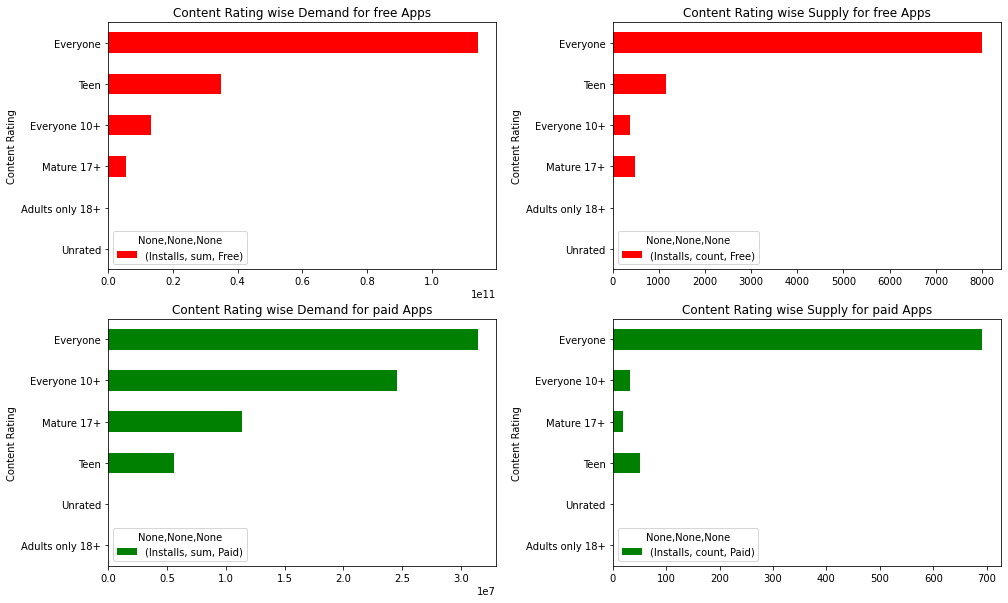

In [141]:
# # df[['Installs', 'Content Rating']].groupby('Content Rating', as_index=False).sum().sort_values(by='Installs', ascending=True).plot(y = 'Installs', x = 'Content Rating', kind = 'barh', figsize  = (10,12))

# df1 = df[['Installs', 'Content Rating', 'Type']]  # Select the columns
# df2 = df1.groupby(by= ['Type', 'Content Rating'], as_index=True).sum().sort_values(by='Installs', ascending=False)  # Create multilayer group by 
# df3 = df2.unstack(level=0)['Installs'].fillna(0)        # Unstack using index 
# df4 = df3.reset_index()               # Reset the index 



# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Horizontally stacked subplots')
# fig.subplots_adjust(hspace=0.5, wspace = 0.5)
# # plt.figure(figsize=(16,10))

# df4.sort_values(by='Paid', ascending=True).plot(y = 'Paid', x = 'Content Rating',ax =ax1, kind = 'barh', figsize  = (16,10),color= 'red')
# df4.sort_values(by='Free', ascending=True).plot(y = 'Free', x = 'Content Rating',ax =ax2, kind = 'barh', figsize  = (16,10),color= 'green')
# plt.show()

# =====================================
# Pie plot 
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
# fig.suptitle('Horizontally stacked subplots')
# fig.subplots_adjust(hspace=0.5, wspace = 0.5)

# df3.plot( kind = 'pie', subplots = True, ax = (ax1, ax2))
# plt.show()

# =====================================
df1 = df[['Installs', 'Content Rating', 'Type']]  # Select the columns
df2 = df1.groupby(by= ['Type', 'Content Rating'], as_index=True).agg(['sum', 'count']).unstack(level=0).fillna(0)

fig, axs = plt.subplots(2, 2)
# fig.suptitle('Demand and Supply of Category Class')
fig.subplots_adjust(hspace=0.2, wspace = 0.3)

df2.sort_values(by=('Installs', 'sum', 'Free'), ascending=True).plot(y = ('Installs', 'sum', 'Free'), ax = axs[0, 0], kind = 'barh', figsize  = (16,10),color= 'red', title = "Content Rating wise Demand for free Apps")
df2.sort_values(by=('Installs', 'sum', 'Free'), ascending=True).plot(y = ('Installs', 'count', 'Free'), ax = axs[0, 1], kind = 'barh', figsize  = (16,10),color= 'red', title = "Content Rating wise Supply for free Apps")

df2.sort_values(by=('Installs', 'sum', 'Paid'), ascending=True).plot(y = ('Installs', 'sum', 'Paid'), ax = axs[1, 0], kind = 'barh', figsize  = (16,10),color= 'green', title = "Content Rating wise Demand for paid Apps")
df2.sort_values(by=('Installs', 'sum', 'Paid'), ascending=True).plot(y = ('Installs', 'count', 'Paid'), ax = axs[1, 1], kind = 'barh', figsize  = (16,10),color= 'green', title = "Content Rating wise Supply for paid Apps")
plt.show()

#### Plot (6)
Box plot of Rating, Reviews, Size, Installs, and Price

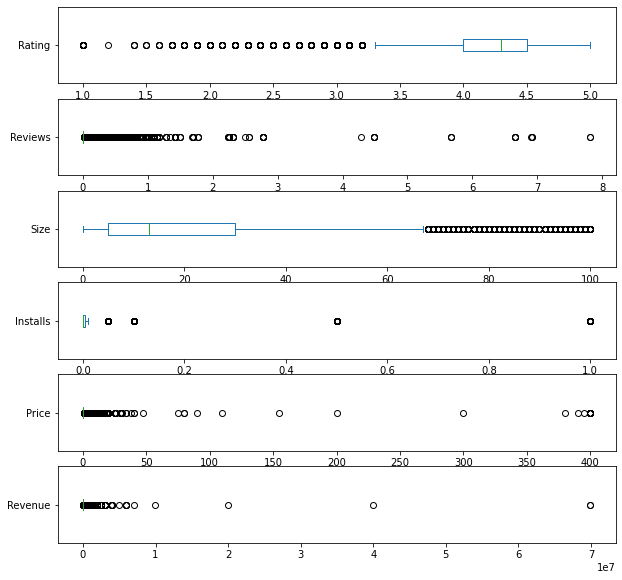

In [137]:
df.plot(kind = 'box', figsize  = (10,20),subplots = True, vert=0, layout  = (12,1),sharex = False)
plt.show()

In [138]:
df.describe()

,Rating,Reviews,Size,Installs,Price,Revenue
count,9360.000000,1.082900e+04,9135.000000,1.082900e+04,10829.000000,1.082900e+04
mean,4.191838,4.446018e+05,21.534957,1.547990e+07,1.028091,3.588313e+04
std,0.515263,2.929213e+06,22.593662,8.507114e+07,15.957778,1.066520e+06
min,1.000000,0.000000e+00,0.008500,0.000000e+00,0.000000,0.000000e+00
25%,4.000000,3.800000e+01,4.900000,5.000000e+03,0.000000,0.000000e+00
50%,4.300000,2.100000e+03,13.000000,1.000000e+05,0.000000,0.000000e+00
75%,4.500000,5.481500e+04,30.000000,5.000000e+06,0.000000,0.000000e+00
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000,6.990000e+07


#### Plot (7)
Distribution plot of Rating, Reviews, Size, Installs, Price

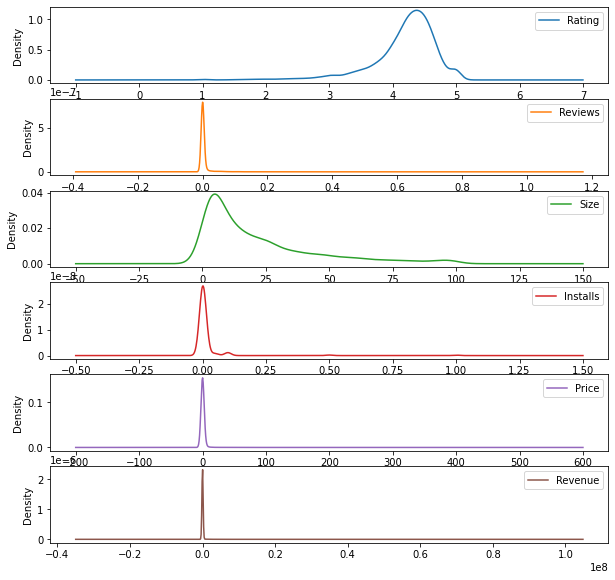

In [65]:
df1 = df
df1["Revenue"] = df1["Price"]*df1["Installs"]
df1.plot(kind = 'density', figsize  = (10,20),subplots = True, layout  = (12,1),sharex = False)
plt.show()



### Plot 
Top 100 highest revenue making apps analysis

In [135]:
df1 = df
df1["Revenue"] = df1["Price"]*df1["Installs"]
df2 = df1[['App', 'Price', 'Installs', "Content Rating", 'Genres', 'Category' ,'Revenue']].sort_values(by=['Revenue'], ascending = False).set_index('App').head(100)
df2



,Price,Installs,Content Rating,Genres,Category,Revenue
App,,,,,,
Minecraft,6.99,10000000,Everyone 10+,Arcade;Action & Adventure,FAMILY,69900000.0
Minecraft,6.99,10000000,Everyone 10+,Arcade;Action & Adventure,FAMILY,69900000.0
I am rich,399.99,100000,Everyone,Lifestyle,LIFESTYLE,39999000.0
I Am Rich Premium,399.99,50000,Everyone,Finance,FINANCE,19999500.0
Hitman Sniper,0.99,10000000,Mature 17+,Action,GAME,9900000.0
...,...,...,...,...,...,...
Toca Builders,3.99,100000,Everyone,Education;Creativity,FAMILY,399000.0
Battery HD Pro,3.99,100000,Everyone,Tools,TOOLS,399000.0
Superbrothers Sword & Sworcery,3.99,100000,Teen,Adventure,GAME,399000.0


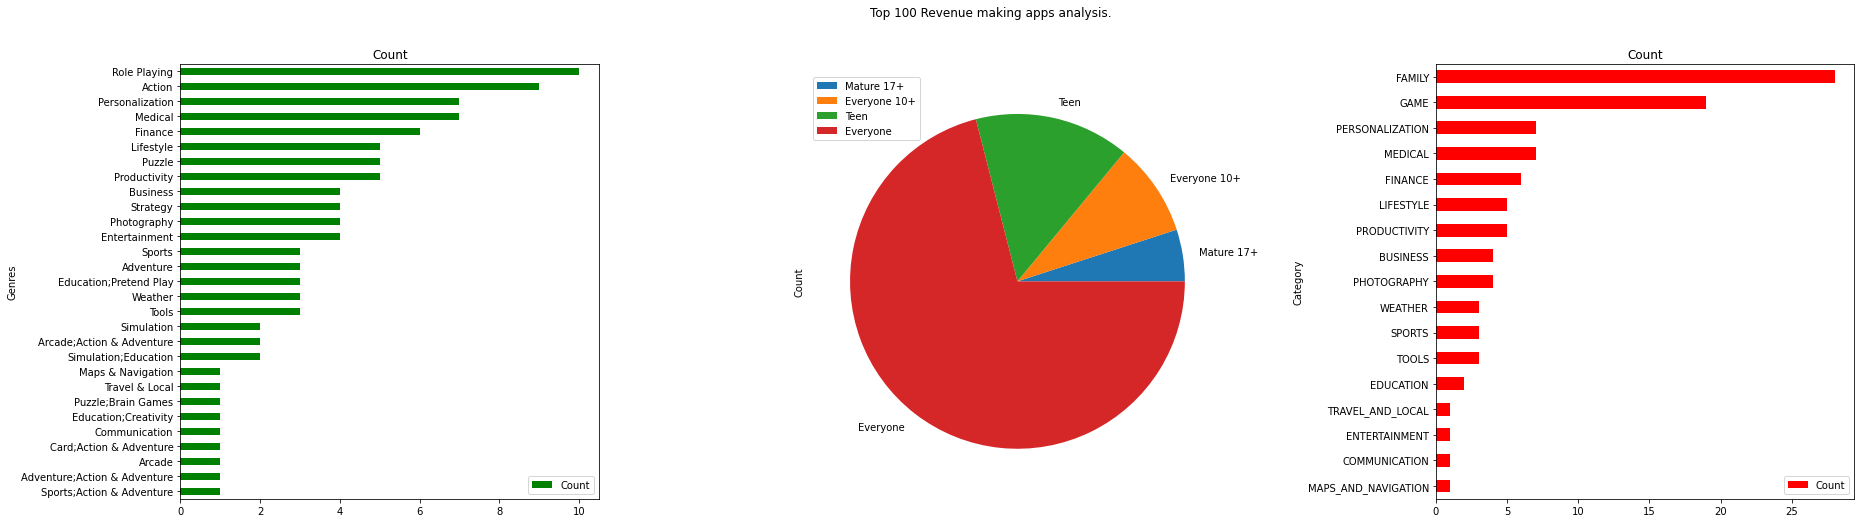

In [136]:
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,50))
fig, axs = plt.subplots(1, 3, figsize=(30,8))
fig.suptitle('Horizontally stacked subplots')
fig.subplots_adjust(hspace=0.5, wspace = 0.5)


# Category in top 100 Revenue making apps.
df3 = df2[['Category','Installs']].groupby(by= 'Category', as_index=True).count().fillna(0).rename(columns={'Installs': 'Count'}).sort_values(by=['Count'], ascending = True)
df3.plot(kind = 'barh', figsize  = (10,20),subplots = True,sharex = False, title = "Category in top 100 Revenue making apps.", ax = axs[2], color = 'red')


# Content Rating in top 100 Revenue making apps.
df3 = df2[['Content Rating','Installs']].groupby(by= 'Content Rating', as_index=True).count().fillna(0).rename(columns={'Installs': 'Count'}).sort_values(by=['Count'], ascending = True)
df3.plot(kind = 'pie', figsize  = (10,20),subplots = True,sharex = False, title = "Content Rating in top 100 Revenue making apps.", ax = axs[1])

# Genres in top 100 Revenue making apps.
df3 = df2[['Genres','Installs']].groupby(by= 'Genres', as_index=True).count().fillna(0).rename(columns={'Installs': 'Count'}).sort_values(by=['Count'], ascending = True)
df3.plot(kind = 'barh', figsize  = (10,20),subplots = True,sharex = False, title = "Top 100 Revenue making apps analysis.", ax = axs[0], color = 'green')
plt.show()

# # =====================================
# # Content Rating in top 100 Revenue making apps.
# df3 = df2[['Content Rating','Installs']].groupby(by= 'Content Rating', as_index=True).count().fillna(0).rename(columns={'Installs': 'Count'}).sort_values(by=['Count'], ascending = True)
# df3.plot(kind = 'pie', figsize  = (10,5),subplots = True,sharex = False, title = "Content Rating in top 100 Revenue making apps.")
# plt.show()

# # Category in top 100 Revenue making apps.
# df3 = df2[['Category','Installs']].groupby(by= 'Category', as_index=True).count().fillna(0).rename(columns={'Installs': 'Count'}).sort_values(by=['Count'], ascending = True)
# df3.plot(kind = 'barh', figsize  = (10,10),subplots = True,sharex = False, title = "Category in top 100 Revenue making apps.")
# plt.show()

#### Plot (8)
Correlation heatmap of Rating, Reviews, Size, Installs, and Price.

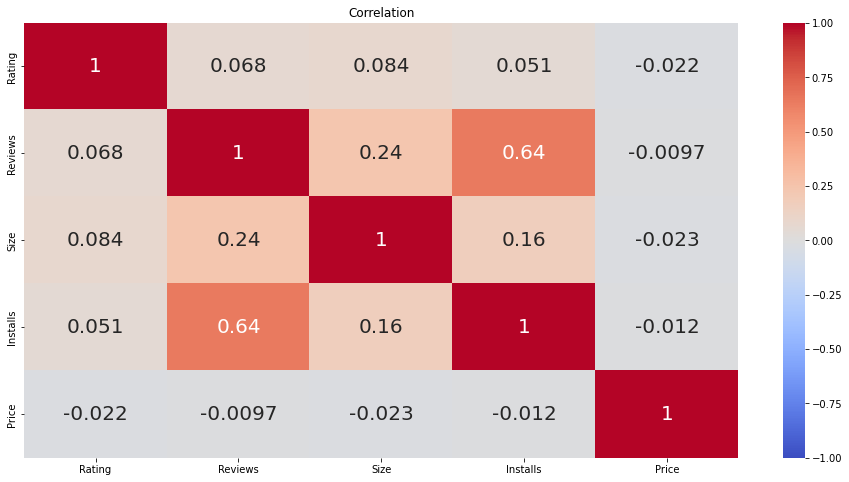

In [37]:
# 
corr = df.corr()


plt.figure(figsize=(16,8))
# sns.heatmap(corr, vmax=1, vmin=-1, center=0,
# 			linewidth=.5,square=True, annot = True,
#             annot_kws = {'size':8},fmt='.1f', cmap='BrBG_r', ax=ax1,  # ax: use this when using subplot
#             cbar_kws = dict(use_gridspec=False,location="top", shrink=0.9)) # cbar_kws: for positioning cbar and "shrink" for reducing cbar size

sns.heatmap(corr, xticklabels= corr.columns, yticklabels = corr.columns, annot = True, annot_kws = {'size':20}, vmin=-1, cmap='coolwarm')

plt.title('Correlation')
plt.show()

#### Plot (9)
Pair plot of Rating, Reviews, Size, Installs, and Price.

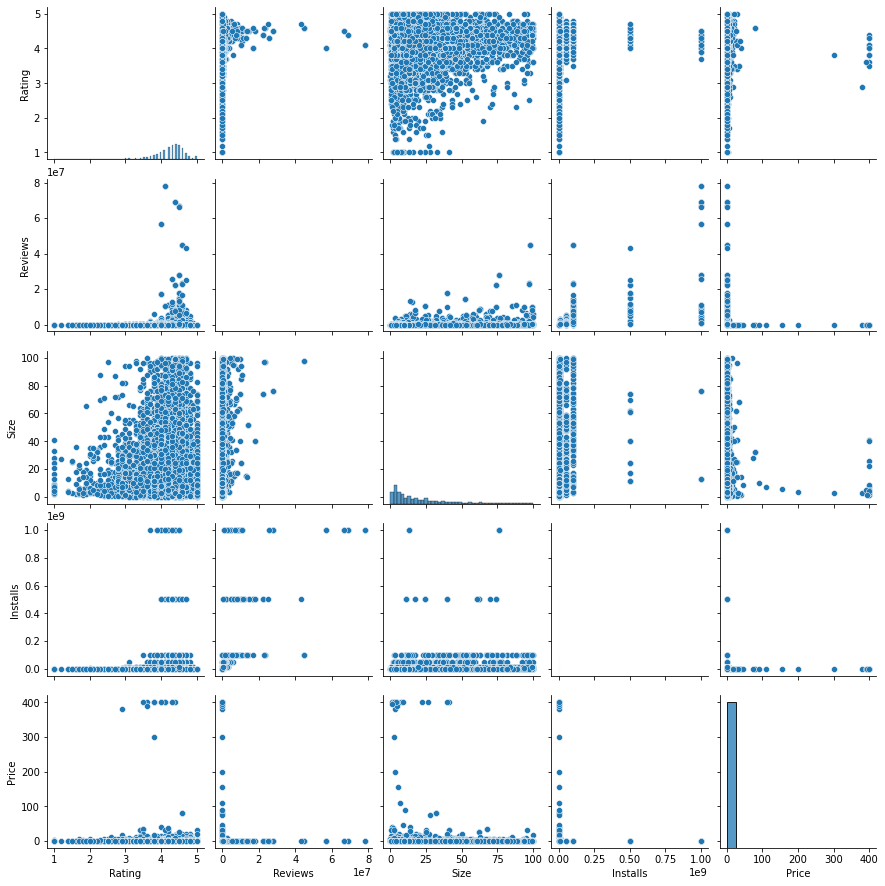

In [38]:
# Plot the pair plot
sns.pairplot(df)
plt.show()

#### Plot (10)

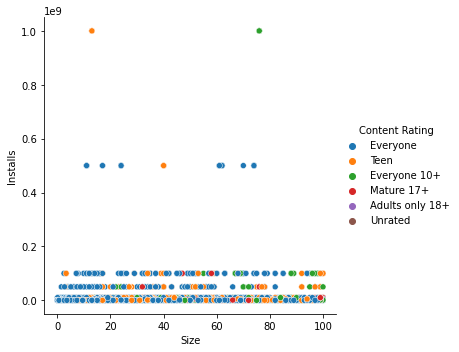

In [39]:
sns.relplot(x ='Size', y = 'Installs', hue = 'Content Rating', data = df)
# Price

In [40]:
# Lets check how many genreas are there 

List_of_Genres = []
for i in df['Genres'].unique():
    if ";" not in i:
        List_of_Genres.append(i)
    if ";" in i:
        List_of_Genres + i.split(";")
set_of_Genres = set(List_of_Genres)

print(f"There are a total of {len(set_of_Genres)} unique generas.")

There are a total of 47 unique generas.


In [41]:

df1 = df[['Installs', 'Content Rating', 'Type']]  # Select the columns
df2 = df1.groupby(by= ['Type', 'Content Rating'], as_index=True).sum().sort_values(by='Installs', ascending=False)  # Create multilayer group by 
df3 = df2.unstack(level=0)['Installs'].fillna(0)        # Unstack using index 
df4 = df3.reset_index()               # Reset the index 

df2

Installs
Type Content Rating               
Free Everyone         114123661390
     Teen              34710763463
     Everyone 10+      13209367295
     Mature 17+         5513108658
Paid Everyone             31421121
     Everyone 10+         24514500
     Mature 17+           11382520
     Teen                  5586930
Free Adults only 18+       2000000
     Unrated                 50500

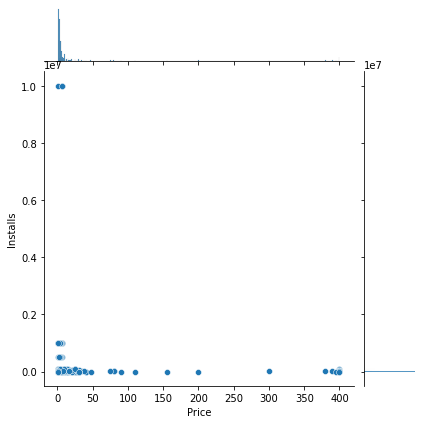

In [47]:
# df[['Installs', 'Size']].plot(y = 'Installs', x = 'Size', kind = 'scatter', figsize  = (10,12))
# Removing all the free apps 
df1 = df[df['Price'] != 0 ]

sns.jointplot(x='Price', y='Installs', data=df1)
plt.show()

In [48]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,4.4 and up


### Plot 
Average rating per app for each category

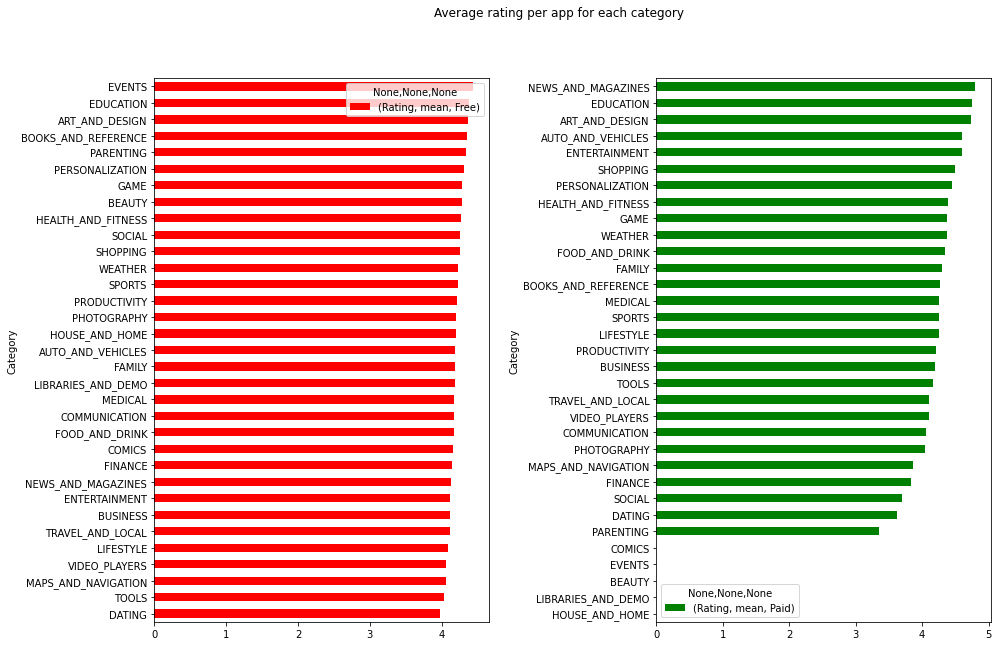

In [162]:
df1 = df[['Installs', 'Rating', 'Category', 'Type']]  # Select the columns
df2 = df1.groupby(by= ['Type', 'Category'], as_index=True).agg(['mean', 'count']).unstack(level=0).fillna(0)

fig, axs = plt.subplots(1, 2, figsize  = (15,10))
fig.suptitle('Average rating per app for each category')
fig.subplots_adjust(hspace=0.2, wspace = 0.5)

df2.sort_values(by=('Rating', 'mean', 'Free'), ascending=True).plot(y = ('Rating', 'mean', 'Free'), ax = axs[0], kind = 'barh',color= 'red')
# df2.sort_values(by=('Rating', 'mean', 'Free'), ascending=True).plot(y = ('Rating', 'count', 'Free'), ax = axs[0, 1], kind = 'barh',color= 'red')

df2.sort_values(by=('Rating', 'mean', 'Paid'), ascending=True).plot(y = ('Rating', 'mean', 'Paid'), ax = axs[1], kind = 'barh',color= 'green')
# df2.sort_values(by=('Rating', 'mean', 'Paid'), ascending=True).plot(y = ('Rating', 'count', 'Paid'), ax = axs[1, 1], kind = 'barh',color= 'green')
plt.show()

### Plot
Average reviews per app for each category

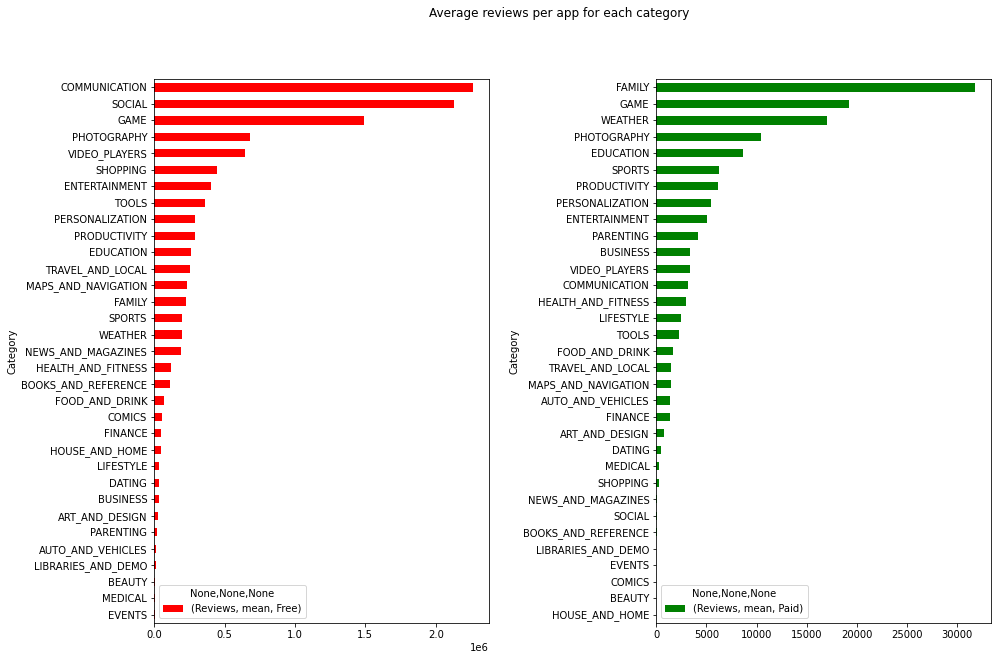

In [163]:
df1 = df[['Installs', 'Reviews', 'Category', 'Type']]  # Select the columns
df2 = df1.groupby(by= ['Type', 'Category'], as_index=True).agg(['mean', 'count']).unstack(level=0).fillna(0)

fig, axs = plt.subplots(1, 2, figsize  = (15,10))
fig.suptitle('Average reviews per app for each category')
fig.subplots_adjust(hspace=0.2, wspace = 0.5)

df2.sort_values(by=('Reviews', 'mean', 'Free'), ascending=True).plot(y = ('Reviews', 'mean', 'Free'), ax = axs[0], kind = 'barh',color= 'red')
# df2.sort_values(by=('Rating', 'mean', 'Free'), ascending=True).plot(y = ('Rating', 'count', 'Free'), ax = axs[0, 1], kind = 'barh',color= 'red')

df2.sort_values(by=('Reviews', 'mean', 'Paid'), ascending=True).plot(y = ('Reviews', 'mean', 'Paid'), ax = axs[1], kind = 'barh',color= 'green')
# df2.sort_values(by=('Rating', 'mean', 'Paid'), ascending=True).plot(y = ('Rating', 'count', 'Paid'), ax = axs[1, 1], kind = 'barh',color= 'green')
plt.show()

### Plot 

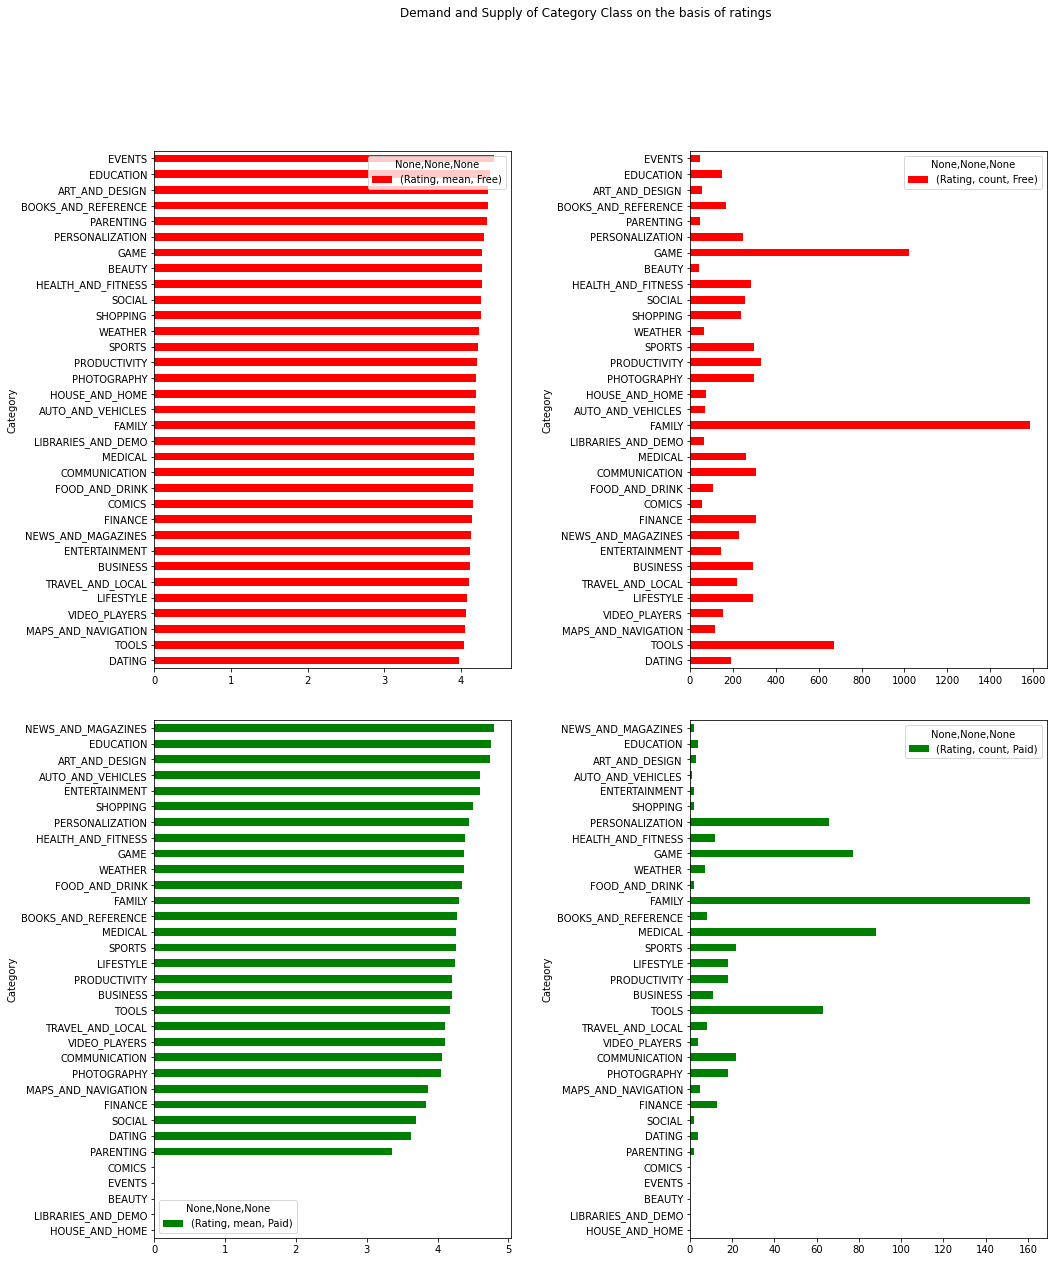

In [50]:
df1 = df[['Installs', 'Rating', 'Category', 'Type']]  # Select the columns
df2 = df1.groupby(by= ['Type', 'Category'], as_index=True).agg(['mean', 'count']).unstack(level=0).fillna(0)

fig, axs = plt.subplots(2, 2)
fig.suptitle('Demand and Supply of Category Class on the basis of ratings')
fig.subplots_adjust(hspace=0.1, wspace = 0.5)

df2.sort_values(by=('Rating', 'mean', 'Free'), ascending=True).plot(y = ('Rating', 'mean', 'Free'), ax = axs[0, 0], kind = 'barh', figsize  = (16,20),color= 'red')
df2.sort_values(by=('Rating', 'mean', 'Free'), ascending=True).plot(y = ('Rating', 'count', 'Free'), ax = axs[0, 1], kind = 'barh', figsize  = (16,20),color= 'red')

df2.sort_values(by=('Rating', 'mean', 'Paid'), ascending=True).plot(y = ('Rating', 'mean', 'Paid'), ax = axs[1, 0], kind = 'barh', figsize  = (16,20),color= 'green')
df2.sort_values(by=('Rating', 'mean', 'Paid'), ascending=True).plot(y = ('Rating', 'count', 'Paid'), ax = axs[1, 1], kind = 'barh', figsize  = (16,20),color= 'green')
plt.show()

In [51]:
df1 = df[['Installs', 'Reviews', 'Category', 'Type']]  # Select the columns
df2 = df1.groupby(by= ['Type', 'Category'], as_index=True).agg(['mean', 'count']).unstack(level=0).fillna(0)

df2

Installs                                     Reviews  \
                             mean                  count                 mean   
Type                         Free           Paid    Free   Paid          Free   
Category                                                                        
ART_AND_DESIGN       2.037985e+06    5333.333333    61.0    3.0  2.806916e+04   
AUTO_AND_VEHICLES    6.473178e+05   16716.666667    82.0    3.0  1.414028e+04   
BEAUTY               5.131519e+05       0.000000    53.0    0.0  7.476226e+03   
BOOKS_AND_REFERENCE  9.512105e+06     832.714286   202.0   28.0  1.086993e+05   
BUSINESS             2.245520e+06   29483.928571   446.0   14.0  3.118315e+04   
COMICS               9.347692e+05       0.000000    60.0    0.0  5.638793e+04   
COMMUNICATION        9.068310e+07   50372.222222   360.0   27.0  2.264939e+06   
DATING               1.164271e+06    3050.000000   227.0    7.0  3.210627e+04   
EDUCATION            5.729276e+06  150500.000000   152.0    4.0  2.602707e+05   
ENTERTAINMENT        1.951673e+07  100000.000000   147.0    2.0  4.025044e+05   
EVENTS               2.535422e+05       1.000000    63.0    1.0  2.555841e+03   
FAMILY               5.751958e+06  164325.336842  1778.0  190.0  2.273227e+05   
FINANCE              2.511356e+06   10917.764706   349.0   17.0  5.022215e+04   
FOOD_AND_DRINK       2.190710e+06   30000.000000   125.0    2.0  7.103946e+04   
GAME                 3.304894e+07  254216.445783  1061.0   83.0  1.492772e+06   
HEALTH_AND_FITNESS   4.869226e+06   35881.875000   325.0   16.0  1.164487e+05   
HOUSE_AND_HOME       1.917187e+06       0.000000    88.0    0.0  4.518619e+04   
LIBRARIES_AND_DEMO   7.469375e+05     100.000000    83.0    1.0  1.225264e+04   
LIFESTYLE            1.477863e+06   62058.421053   363.0   19.0  3.535912e+04   
MAPS_AND_NAVIGATION  5.486067e+06   24220.000000   132.0    5.0  2.322126e+05   
MEDICAL              1.475633e+05    9358.100917   354.0  109.0  4.387743e+03   
NEWS_AND_MAGAZINES   2.667727e+07    2750.000000   281.0    2.0  1.935967e+05   
PARENTING            5.426036e+05   25050.000000    58.0    2.0  1.637871e+04   
PERSONALIZATION      7.533201e+06   64119.439024   308.0   82.0  2.886243e+05   
PHOTOGRAPHY          3.221811e+07  180851.818182   313.0   22.0  6.814249e+05   
PRODUCTIVITY         3.579464e+07   50430.535714   396.0   28.0  2.877405e+05   
SHOPPING             1.258852e+07    5050.000000   258.0    2.0  4.458943e+05   
SOCIAL               4.818446e+07    2000.000000   292.0    3.0  2.127538e+06   
SPORTS               4.860919e+06   51825.625000   360.0   24.0  1.963320e+05   
TOOLS                1.498762e+07   22434.168831   764.0   77.0  3.573418e+05   
TRAVEL_AND_LOCAL     2.792156e+07   15255.000000   246.0   12.0  2.544709e+05   
VIDEO_PLAYERS        3.638557e+07   17750.000000   171.0    4.0  6.454200e+05   
WEATHER              5.747142e+06  101500.000000    74.0    8.0  1.955175e+05   

                                                  
                                    count         
Type                         Paid    Free   Paid  
Category                                          
ART_AND_DESIGN         722.000000    61.0    3.0  
AUTO_AND_VEHICLES     1387.666667    82.0    3.0  
BEAUTY                   0.000000    53.0    0.0  
BOOKS_AND_REFERENCE     64.142857   202.0   28.0  
BUSINESS              3347.785714   446.0   14.0  
COMICS                   0.000000    60.0    0.0  
COMMUNICATION         3119.037037   360.0   27.0  
DATING                 450.571429   227.0    7.0  
EDUCATION             8661.250000   152.0    4.0  
ENTERTAINMENT         5004.500000   147.0    2.0  
EVENTS                   0.000000    63.0    1.0  
FAMILY               31822.900000  1778.0  190.0  
FINANCE               1364.588235   349.0   17.0  
FOOD_AND_DRINK        1698.500000   125.0    2.0  
GAME                 19174.734940  1061.0   83.0  
HEALTH_AND_FITNESS    2993.750000   325.0   16.0  
HOUSE_A

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          9360 non-null   float64
 3   Reviews         10829 non-null  int64  
 4   Size            9135 non-null   float64
 5   Installs        10829 non-null  int64  
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  float64
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Android Ver     10829 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 1.2+ MB
